Using dataset: c:\Users\mackrish_malik\Desktop\clinical-insights-assistant\data\clinical_trial_data.csv
✅ Dataset loaded successfully!
Shape: (6000, 9)

Cohorts found: ['A', 'B']

📋 Cohort Summary (Mean Outcomes & Patient Counts):


,cohort,mean_outcome,count
0,A,83.233079,101
1,B,83.246679,99


C:\Users\mackrish_malik\AppData\Local\Temp\ipykernel_25364\4170804539.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="cohort", y="outcome_score", data=df, palette="Set2")


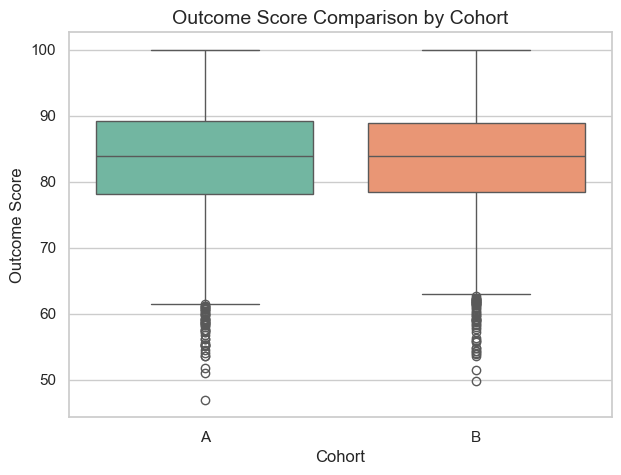

C:\Users\mackrish_malik\AppData\Local\Temp\ipykernel_25364\4170804539.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="cohort", y="compliance_pct", data=df, palette="muted", inner="quartile")


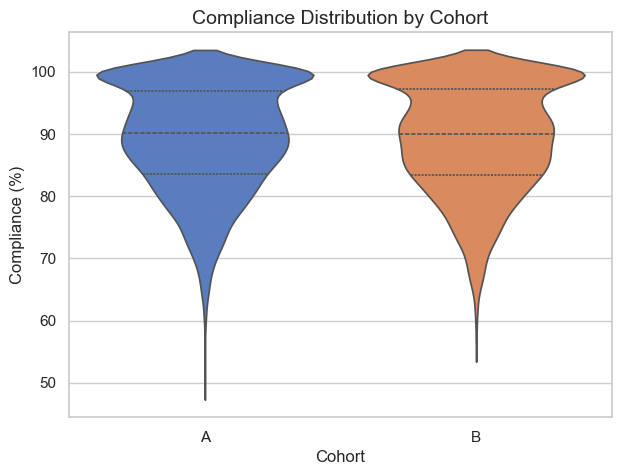

C:\Users\mackrish_malik\AppData\Local\Temp\ipykernel_25364\4170804539.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="cohort", y="event_rate", data=event_rate, palette="coolwarm")


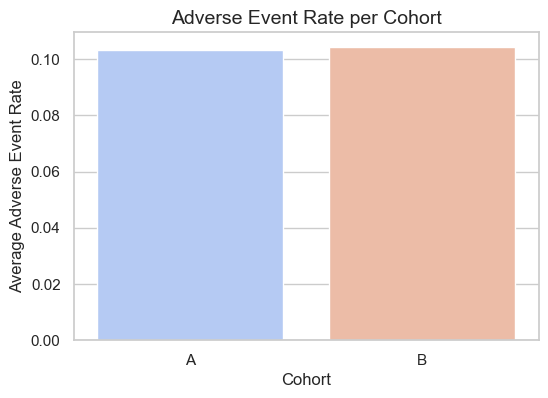

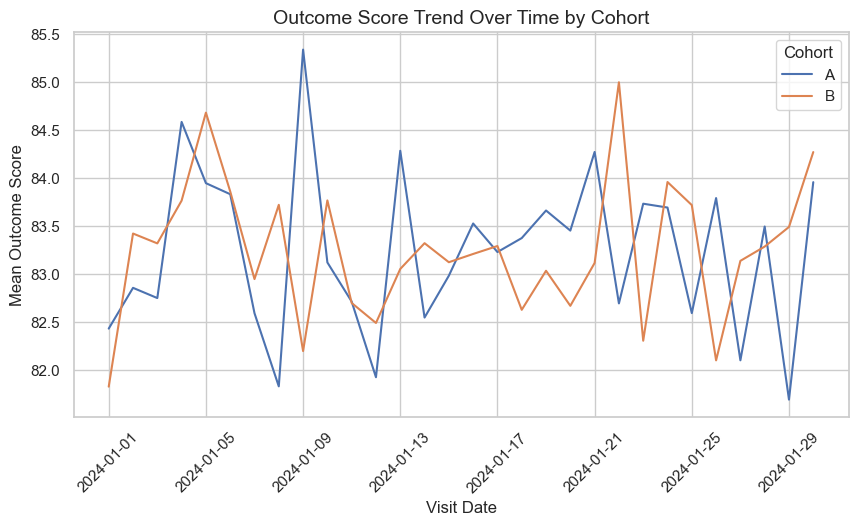


📈 Outcome Score Descriptive Statistics by Cohort:


cohort,A,B
count,3030.000000,2970.000000
mean,83.233079,83.246679
std,8.440407,8.251311
min,46.941286,49.736938
25%,78.109148,78.462444
50%,83.838824,83.864969
75%,89.174077,88.949961
max,100.000000,100.000000


✅ Cohort comparison completed successfully!
Insights generated:
- Average outcomes per cohort
- Compliance & adverse event differences
- Trends over time
- Distribution & statistical analysis


In [1]:
"""
Capstone 3 - Clinical Insights Assistant
Notebook: 03_cohort_comparison.ipynb
--------------------------------------
Compares clinical trial results between cohorts:
- Outcome scores
- Compliance levels
- Adverse event frequencies
- Statistical summary & visualization
"""

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import cohort analysis function
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../src")))
from cohort_analysis import cohort_summary

# ------------------- CONFIG -------------------
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")

# ✅ Universal data path
project_root = os.getcwd()
if "notebooks" in project_root:
    DATA_PATH = os.path.abspath(os.path.join(project_root, "../data/clinical_trial_data.csv"))
else:
    DATA_PATH = os.path.abspath(os.path.join(project_root, "data/clinical_trial_data.csv"))

print("Using dataset:", DATA_PATH)

# ------------------- LOAD DATA -------------------
df = pd.read_csv(DATA_PATH, parse_dates=["visit_date"])
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]

print("✅ Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print("\nCohorts found:", df["cohort"].unique().tolist() if "cohort" in df.columns else "No cohort column found!")

# ------------------- 1. Cohort Summary -------------------
if "cohort" not in df.columns:
    raise KeyError("❌ Missing 'cohort' column. Please verify dataset structure.")

cohort_df = cohort_summary(df)
print("\n📋 Cohort Summary (Mean Outcomes & Patient Counts):")
display(cohort_df)

# ------------------- 2. Outcome Comparison -------------------
plt.figure(figsize=(7, 5))
sns.boxplot(x="cohort", y="outcome_score", data=df, palette="Set2")
plt.title("Outcome Score Comparison by Cohort", fontsize=14)
plt.xlabel("Cohort")
plt.ylabel("Outcome Score")
plt.show()

# ------------------- 3. Compliance Comparison -------------------
if "compliance_pct" in df.columns:
    plt.figure(figsize=(7, 5))
    sns.violinplot(x="cohort", y="compliance_pct", data=df, palette="muted", inner="quartile")
    plt.title("Compliance Distribution by Cohort", fontsize=14)
    plt.xlabel("Cohort")
    plt.ylabel("Compliance (%)")
    plt.show()
else:
    print("ℹ️ Compliance column not found, skipping compliance comparison plot.")

# ------------------- 4. Adverse Event Rate by Cohort -------------------
if "adverse_event_flag" in df.columns:
    plt.figure(figsize=(6, 4))
    event_rate = (
        df.groupby("cohort")["adverse_event_flag"].mean().reset_index().rename(columns={"adverse_event_flag": "event_rate"})
    )
    sns.barplot(x="cohort", y="event_rate", data=event_rate, palette="coolwarm")
    plt.title("Adverse Event Rate per Cohort", fontsize=14)
    plt.ylabel("Average Adverse Event Rate")
    plt.xlabel("Cohort")
    plt.show()
else:
    print("ℹ️ Adverse event flag not found, skipping adverse event plot.")

# ------------------- 5. Outcome Trend by Cohort Over Time -------------------
plt.figure(figsize=(10, 5))
trend_df = df.groupby(["visit_date", "cohort"])["outcome_score"].mean().reset_index()
sns.lineplot(x="visit_date", y="outcome_score", hue="cohort", data=trend_df)
plt.title("Outcome Score Trend Over Time by Cohort", fontsize=14)
plt.xlabel("Visit Date")
plt.ylabel("Mean Outcome Score")
plt.xticks(rotation=45)
plt.legend(title="Cohort")
plt.show()

# ------------------- 6. Statistical Comparison -------------------
cohort_groups = df.groupby("cohort")["outcome_score"].describe().T
print("\n📈 Outcome Score Descriptive Statistics by Cohort:")
display(cohort_groups)

# ------------------- WRAP-UP -------------------
print("✅ Cohort comparison completed successfully!")
print("Insights generated:")
print("- Average outcomes per cohort")
print("- Compliance & adverse event differences")
print("- Trends over time")
print("- Distribution & statistical analysis")
